In [128]:
# imports
import pandas as pd
import numpy as np

In [129]:
# fetch manga csv
manga_df = pd.read_csv('./data/manga.csv')
manga_df.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


In [130]:
# get columns
columns = manga_df.columns
print(columns)

# get all genres
genres = manga_df['genres']
grenres = genres.dropna()
grenres

Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'start_date', 'end_date', 'members', 'favorites', 'sfw',
       'approved', 'created_at_before', 'updated_at', 'real_start_date',
       'real_end_date', 'genres', 'themes', 'demographics', 'authors',
       'serializations', 'synopsis', 'background', 'main_picture', 'url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')


0        ['Action', 'Adventure', 'Award Winning', 'Dram...
1                       ['Action', 'Adventure', 'Fantasy']
2        ['Action', 'Adventure', 'Mystery', 'Supernatur...
3                               ['Drama', 'Slice of Life']
4        ['Action', 'Adventure', 'Award Winning', 'Dram...
                               ...                        
64828                          ['Romance', 'Supernatural']
64829                           ['Comedy', 'Supernatural']
64830                          ['Romance', 'Supernatural']
64831                                           ['Comedy']
64832                                 ['Action', 'Sci-Fi']
Name: genres, Length: 64833, dtype: object

In [131]:
import ast

# get unique genres
unique_genres = []

for genre in grenres:
    genre = ast.literal_eval(genre)
    unique_genres.extend(genre)

unique_genres = list(set(unique_genres))
unique_genres

['Erotica',
 'Supernatural',
 'Mystery',
 'Award Winning',
 'Drama',
 'Comedy',
 'Horror',
 'Girls Love',
 'Boys Love',
 'Sci-Fi',
 'Ecchi',
 'Avant Garde',
 'Fantasy',
 'Sports',
 'Hentai',
 'Gourmet',
 'Action',
 'Slice of Life',
 'Adventure',
 'Suspense',
 'Romance']

In [132]:
# fetch title, score, and genres of manga from the dataframe
data = manga_df[['title', 'score', 'genres', 'favorites', 'synopsis', 'demographics']]

# convert genres to list
data = data.drop_duplicates(subset='title')
data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x))
data['demographics'] = data['demographics'].apply(lambda x: ast.literal_eval(x))
data.dropna(subset=['title'], inplace=True)
data['title'] = data.loc[:, 'title'].apply(lambda x: x.strip().lower())
data

,title,score,genres,favorites,synopsis,demographics
0,berserk,9.47,"[Action, Adventure, Award Winning, Drama, Fant...",119470,"Guts, a former mercenary now known as the ""Bla...",[Seinen]
1,one piece,9.22,"[Action, Adventure, Fantasy]",111462,"Gol D. Roger, a man referred to as the ""King o...",[Shounen]
2,jojo no kimyou na bouken part 7: steel ball run,9.30,"[Action, Adventure, Mystery, Supernatural]",41713,"In the American Old West, the world's greatest...","[Seinen, Shounen]"
3,oyasumi punpun,9.02,"[Drama, Slice of Life]",49361,Punpun Onodera is a normal 11-year-old boy liv...,[Seinen]
4,fullmetal alchemist,9.03,"[Action, Adventure, Award Winning, Drama, Fant...",29634,Alchemists are knowledgeable and naturally tal...,[Shounen]
...,...,...,...,...,...,...
64827,sukidarake horoyoi joshi to icha ero dekichau:...,NaN,[Ecchi],0,A collection of stories about drunken girls.,[]
64828,raise wa kimi no mono,NaN,"[Romance, Supernatural]",0,Saya is living under strained family circumsta...,[Shoujo]
64829,ore to basil no automata,NaN,"[Comedy, Supernatural]",0,"Kamiya Mitsugu, a perverted high school studen...",[]
64830,happy candy virus,NaN,"[Romance, Supernatural]",0,NaN,[]


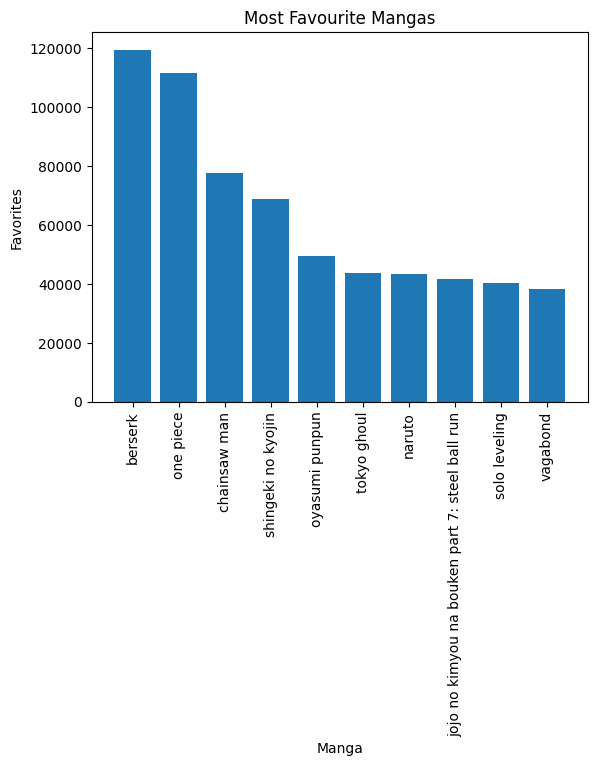

In [133]:
# visualize data
import matplotlib.pyplot as plt

# plot most favourite mangas
favorites = data.sort_values(by='favorites', ascending=False)
favorites = favorites.head(10)
plt.bar(favorites['title'], favorites['favorites'])
plt.title('Most Favourite Mangas')
plt.xlabel('Manga')
plt.ylabel('Favorites')
plt.xticks(rotation=90)
plt.show()


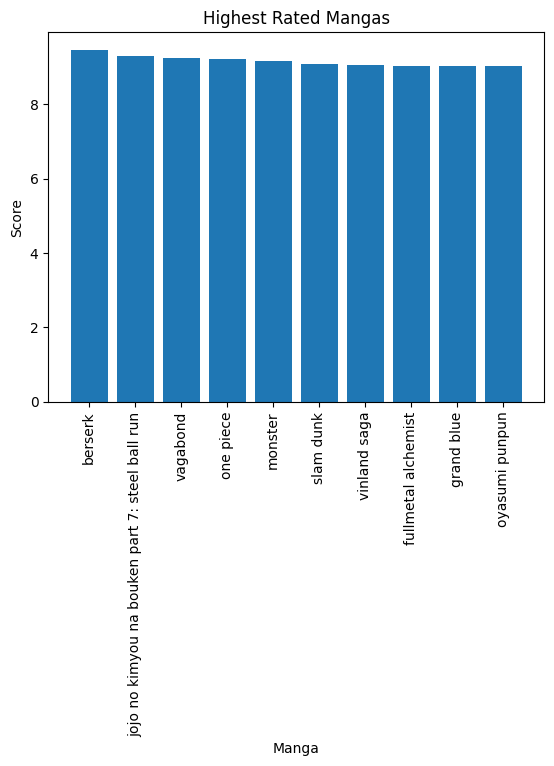

In [134]:
# plot highest rated mangas
highest_rated = data.sort_values(by='score', ascending=False)
highest_rated = highest_rated.head(10)
plt.bar(highest_rated['title'], highest_rated['score'])
plt.title('Highest Rated Mangas')
plt.xlabel('Manga')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

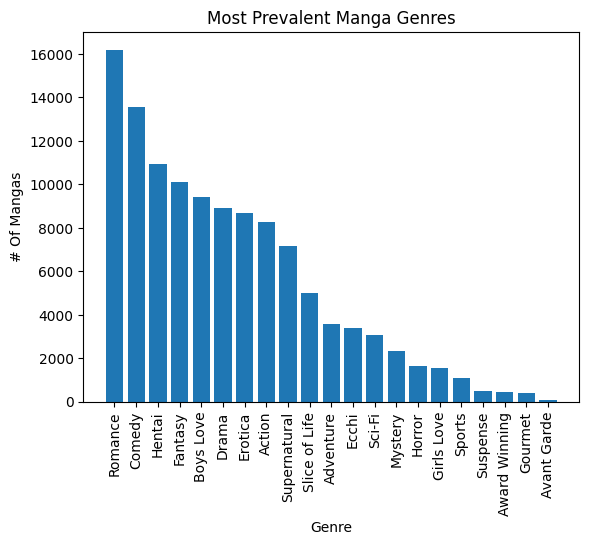

In [135]:
# plot most prevalent manga genres
genre_count = {}

for genre in unique_genres:
    genre_count[genre] = 0

for genre in data['genres']:
    for g in genre:
        genre_count[g] += 1

genre_count = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))
plt.bar(genre_count.keys(), genre_count.values())
plt.title('Most Prevalent Manga Genres')
plt.xlabel('Genre')
plt.ylabel('# Of Mangas')
plt.xticks(rotation=90)
plt.show()

# Observations:

- Most manga genres are 'Romance', 'Comedy', 'Boys Love', 'Drama', among others;
    - Similar genres corresponding to the 'Shoujo' audience.
- Highest rated/favorited mangas are of 'Shounen' variety:
    - Berserk: 'Action', 'Adventure'; One Piece: 'Action', 'Adventure', etc.


# Custom Manga Reccomendation Algorithm
We want to reccommend similar types of mangas based off of the users selection. Important components for a manga reccomendation include `genres`, `synopsis`, `score`, `favorites`, and `demographic`. We will attempt to create such an algorithm in a step-by-step process.

## Data Processing

### Goals:
- Prep genre data (i.e. manga genres)
- Prep demographic/user data (i.e. user ratings, favorites, and demographics)
- Prep manga synopsis data (i.e. what the manga is about)

In [136]:
# prepare genre data

genre_data = data[['title', 'genres']]

for genre in unique_genres:
    genre_data[genre.lower()] = genre_data.loc[:, 'genres'].apply(lambda x: 1 if genre in x else 0)

genre_data.drop(columns=['genres'], inplace=True)
genre_data

/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_31201/1510362240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data[genre.lower()] = genre_data.loc[:, 'genres'].apply(lambda x: 1 if genre in x else 0)
/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_31201/1510362240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data[genre.lower()] = genre_data.loc[:, 'genres'].apply(lambda x: 1 if genre in x else 0)
/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_31201

,title,erotica,supernatural,mystery,award winning,drama,comedy,horror,girls love,boys love,...,avant garde,fantasy,sports,hentai,gourmet,action,slice of life,adventure,suspense,romance
0,berserk,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,one piece,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,jojo no kimyou na bouken part 7: steel ball run,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,oyasumi punpun,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,fullmetal alchemist,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64827,sukidarake horoyoi joshi to icha ero dekichau:...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64828,raise wa kimi no mono,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64829,ore to basil no automata,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64830,happy candy virus,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
# reccomend manga based on similar genres

def get_by_genres(genre_data, genre_weights: dict[str, float]):
    ''' Return a df of mangas and weighted probabilities based on genres specified in genre_weights.
        'genre_prob' column is how close the genres in the mangas match genre_weights weights.
        
        I.e. genre_weights = {'romance': 0.5, 'comedy': 0.2}
        will return a df with 'genre_prob' 
        = genre_data['shounen'] * genre_weights['romance'] + genre_data['seinen'] * genre_weights['romance'].
    '''

    req_columns = ['title']

    try:
        # get demo probabilities
        genre_prob_df = genre_data.loc[:, req_columns + list(genre_weights.keys())]
        genre_prob_df['genre_prob'] = genre_prob_df.iloc[:, len(req_columns):].apply(lambda x: np.dot(x, list(genre_weights.values())), axis=1)
        return genre_prob_df
    except Exception as e:
        print(e)
        return None

In [138]:
# get reccomendations based on genres

genre_weights = {'romance': 0.5, 'comedy': 0.2}

recs = get_by_genres(genre_data, genre_weights)
recs.sample(5)

,title,romance,comedy,genre_prob
29197,yumekui kenbun: moukyoudou,0,0,0.0
38553,koibito wa dannasama,1,0,0.5
39172,mizu no yuuwaku,0,0,0.0
20198,kojika counter!,0,0,0.0
51696,itsuwari no lion,1,0,0.5


In [139]:
# prepare audience/demographic df

audience_data = data[['title', 'score', 'favorites', 'demographics']]
audience_data


,title,score,favorites,demographics
0,berserk,9.47,119470,[Seinen]
1,one piece,9.22,111462,[Shounen]
2,jojo no kimyou na bouken part 7: steel ball run,9.30,41713,"[Seinen, Shounen]"
3,oyasumi punpun,9.02,49361,[Seinen]
4,fullmetal alchemist,9.03,29634,[Shounen]
...,...,...,...,...
64827,sukidarake horoyoi joshi to icha ero dekichau:...,NaN,0,[]
64828,raise wa kimi no mono,NaN,0,[Shoujo]
64829,ore to basil no automata,NaN,0,[]
64830,happy candy virus,NaN,0,[]


In [140]:
# get unique demographics
unique_demographics = set()
for demographic in audience_data['demographics']:
    unique_demographics.update(demographic)

unique_demographics = list(unique_demographics)
unique_demographics

['Seinen', 'Josei', 'Shoujo', 'Shounen', 'Kids']

In [141]:
# update audience df into binary columns
for demographic in unique_demographics:
    audience_data[demographic.lower()] = audience_data.loc[:, 'demographics'].apply(lambda x: 1 if demographic in x else 0)

audience_data.drop(columns=['demographics'], inplace=True)
audience_data
asd = audience_data.iloc[:, 3:].sum()

/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_31201/860870312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audience_data[demographic.lower()] = audience_data.loc[:, 'demographics'].apply(lambda x: 1 if demographic in x else 0)


In [142]:
# get user recommendation score

def get_by_users(audience_data, demo_weights: dict[str, float]):
    ''' Return a df of mangas and weighted probabilities based on demographics specified in demo_weights.
        'demo_prob' column is how close the demographics in the mangas match demo_weights weights.
        
        I.e. demo_weights = {'shounen': 0.5, 'seinen': 0.5}
        will return a df with 'demo_prob' 
        = audience_data['shounen'] * demo_weights['shounen'] + audience_data['seinen'] * demo_weights['seinen'].
    '''
    req_columns = ['title']

    try:
        # get demo probabilities
        demo_prob_df = audience_data.loc[:, req_columns + list(demo_weights.keys())]
        demo_prob_df['demo_prob'] = demo_prob_df.iloc[:, len(req_columns):].apply(lambda x: np.dot(x, list(demo_weights.values())), axis=1)
        return demo_prob_df
    except Exception as e:
        print(e)
        return

In [143]:
# test demo weights recommendation

demo_weights = {'shounen': 0.5, 'seinen': 0.3}
demo_prob_df = get_by_users(audience_data, demo_weights)
demo_prob_df.sample(5)

,title,shounen,seinen,demo_prob
25068,papa to kiss in the dark,0,0,0.0
33585,dreams come true,0,0,0.0
38118,akatsuki no vampiress: aglaiarden no hiyuri,0,0,0.0
32225,fantastic lover,0,0,0.0
49060,possession tracer,0,0,0.0


In [144]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/neil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [145]:
# remove stopwords from manga synopsis

# fetch stopwords
stop_words = set(stopwords.words('english'))

desc_data = data.loc[:, ['title', 'synopsis', 'score']]
desc_data = desc_data.dropna(subset=['synopsis'])
desc_data


,title,synopsis,score
0,berserk,"Guts, a former mercenary now known as the ""Bla...",9.47
1,one piece,"Gol D. Roger, a man referred to as the ""King o...",9.22
2,jojo no kimyou na bouken part 7: steel ball run,"In the American Old West, the world's greatest...",9.30
3,oyasumi punpun,Punpun Onodera is a normal 11-year-old boy liv...,9.02
4,fullmetal alchemist,Alchemists are knowledgeable and naturally tal...,9.03
...,...,...,...
64826,itazura na ai no shisha,"Ellie, who works at a law firm, is at her wits...",NaN
64827,sukidarake horoyoi joshi to icha ero dekichau:...,A collection of stories about drunken girls.,NaN
64828,raise wa kimi no mono,Saya is living under strained family circumsta...,NaN
64829,ore to basil no automata,"Kamiya Mitsugu, a perverted high school studen...",NaN


In [146]:
# filter out non-english words

nltk.download('words')

words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to /Users/neil/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [147]:
# remove stopwords, punctuations, special chars, and non-english words from manga synopsis
desc_data['key_words'] = desc_data['synopsis'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words and word.isalnum() and word.lower() not in words]))
desc_data

,title,synopsis,score,key_words
0,berserk,"Guts, a former mercenary now known as the ""Bla...",9.47,finds respects believes takes guts fulfilling ...
1,one piece,"Gol D. Roger, a man referred to as the ""King o...",9.22,referred confirms located announcing claimed p...
2,jojo no kimyou na bouken part 7: steel ball run,"In the American Old West, the world's greatest...",9.30,american greatest thousands diego kilometers c...
3,oyasumi punpun,Punpun Onodera is a normal 11-year-old boy liv...,9.02,punpun onodera punpun begins meets aiko learns...
4,fullmetal alchemist,Alchemists are knowledgeable and naturally tal...,9.03,alchemists individuals attempts risks siblings...
...,...,...,...,...
64826,itazura na ai no shisha,"Ellie, who works at a law firm, is at her wits...",NaN,italian dna leonizio hopes takes ellie ends co...
64827,sukidarake horoyoi joshi to icha ero dekichau:...,A collection of stories about drunken girls.,NaN,stories
64828,raise wa kimi no mono,Saya is living under strained family circumsta...,NaN,circumstances cares hospitalized doctors cares...
64829,ore to basil no automata,"Kamiya Mitsugu, a perverted high school studen...",NaN,kamiya dolls sorcerers


In [164]:
# get all unique words from manga synopsis'

all_synopsis = desc_data['key_words'].tolist()
all_words = ' '.join(all_synopsis)
unique_words = list(set(all_words.split()))
unique_words[:10]

TypeError: sequence item 0: expected str instance, Counter found

In [149]:
# tokenize words

word_to_index = {word: i for i, word in enumerate(unique_words)}
index_to_word = {i: word for i, word in enumerate(unique_words)}

In [150]:
# test tokinization

from random import sample

sample_words = sample(unique_words, 10)
print(sample_words)

for word in sample_words:
    print(f'{word} -> {word_to_index[word]} -> {index_to_word[word_to_index[word]]}')

['disasterous', 'hasun', 'bachelors', 'jumpei', 'tyed', 'piquing', 'reajuu', 'wiretaps', 'kouzai', 'kya']
disasterous -> 39124 -> disasterous
hasun -> 21096 -> hasun
bachelors -> 17462 -> bachelors
jumpei -> 22689 -> jumpei
tyed -> 6104 -> tyed
piquing -> 9987 -> piquing
reajuu -> 45069 -> reajuu
wiretaps -> 1919 -> wiretaps
kouzai -> 21965 -> kouzai
kya -> 3380 -> kya


In [151]:
# tokenize synopsis
from collections import Counter

desc_data['key_words'] = desc_data.loc[:, 'key_words'].apply(lambda x: Counter(x.split()))
desc_data = desc_data.drop(columns=['score'])
desc_data


,title,synopsis,key_words
0,berserk,"Guts, a former mercenary now known as the ""Bla...","{'finds': 1, 'respects': 1, 'believes': 1, 'ta..."
1,one piece,"Gol D. Roger, a man referred to as the ""King o...","{'referred': 1, 'confirms': 1, 'located': 1, '..."
2,jojo no kimyou na bouken part 7: steel ball run,"In the American Old West, the world's greatest...","{'american': 1, 'greatest': 1, 'thousands': 1,..."
3,oyasumi punpun,Punpun Onodera is a normal 11-year-old boy liv...,"{'punpun': 3, 'onodera': 1, 'begins': 1, 'meet..."
4,fullmetal alchemist,Alchemists are knowledgeable and naturally tal...,"{'alchemists': 2, 'individuals': 1, 'attempts'..."
...,...,...,...
64826,itazura na ai no shisha,"Ellie, who works at a law firm, is at her wits...","{'italian': 1, 'dna': 1, 'leonizio': 1, 'hopes..."
64827,sukidarake horoyoi joshi to icha ero dekichau:...,A collection of stories about drunken girls.,{'stories': 1}
64828,raise wa kimi no mono,Saya is living under strained family circumsta...,"{'circumstances': 1, 'cares': 2, 'hospitalized..."
64829,ore to basil no automata,"Kamiya Mitsugu, a perverted high school studen...","{'kamiya': 1, 'dolls': 1, 'sorcerers': 1}"


## Approach 1: Reccomend Mangas Based on Genres & Demographics

### Idea:

Given a set of mangas the user has already read `read_mangas`, we will reccomend mangas with genres and targeted demographics most similar to the read mangas. As the user selects `liked` and `disliked` mangas from the recommended lot, we will adjust the weights for genres and demographics accordingly.

### Steps:
1. User inputs mangas they've read `read_mangas`.
2. We initialize weights for genres `genre_weights` and demographics `demo_weights` evenly based on `read_mangas`.
    - I.e. If the user reads mangas with a total of 4 romance and 2 comedy genres, then romance weight = 4/6 and comedy weight = 2/6.
3. We initialize biases for genres and demographics, where genres and demographic are weighted evenly at the start (50% each).
4. Weights and biases are updated as the `liked`, `disliked`, or `read` mangas are inputted.

In [152]:

# class to store user stats
class LabeledStats():
    def __init__(self, data: pd.Series):
        self.labels = data.keys()
        self.stats = {label: data[label] for label in self.labels}
        self.total: int = data.sum()
        self.ratios = {label: data[label] / max(self.total, 1) for label in data.keys()}

In [153]:
# class to cache user stats

class UserStatsCache():
    def __init__(self, size: int = 5):
        self.cache: list = []
        self.size: int = min(5, size) # limit cache size
        
    
    def add_stat(self, liked_genre_stats: LabeledStats, disliked_genre_stats: LabeledStats,
                 liked_demo_stats: LabeledStats, disliked_demo_stats: LabeledStats):
        if len(self.cache) >= self.size:
            self.cache.pop(0)

        self.cache.append({'genre': {'liked': liked_genre_stats, 'disliked': disliked_genre_stats, 'total': liked_genre_stats.total + disliked_genre_stats.total},
                           'demographic': {'liked': liked_demo_stats, 'disliked': disliked_demo_stats, 'total': liked_demo_stats.total + disliked_demo_stats.total}})
    
    def cache_changes(self, entryA: int = -2, entryB: int = -1, label: str = 'genre'):
        ''' Return the change in genre stats between entryB and entryA in the cache at label label.
            Defaults to the last two entries with label = 'genre'; label in ('genre', 'demographic').
        '''

        if len(self.cache) < 2 or label not in ('genre', 'demographic'):
            return (-1, -1)
        
        try:
            # get cache comparison entries
            prev = self.cache[entryA][label]
            curr = self.cache[entryB][label]

            # get differences in liked and disliked mangas between curr and prev
            liked_changes = {label: curr['liked'].ratios[label] - prev['liked'].ratios[label] for label in curr['liked'].labels}
            liked_changes = {k: v for k, v in sorted(liked_changes.items(), key=lambda item: item[1])}
            disliked_changes = {label: curr['disliked'].ratios[label] - prev['disliked'].ratios[label] for label in curr['disliked'].labels}
            disliked_changes = {k: v for k, v in sorted(disliked_changes.items(), key=lambda item: item[1])}

            return liked_changes, disliked_changes
        
        except Exception as e:
            print(e)
            return (None, None)

In [154]:
# manga recommendation algorithm

class MyReccomendations():
    def __init__(self, genre_data: pd.DataFrame, audience_data: pd.DataFrame, 
                 unique_demographics: list[str], unique_genres: list[str]):
        # store manga data
        self.genre_data = genre_data
        self.audience_data = audience_data

        # store recommendations df
        self.recs_data = None

        # required columns for each df
        self.req_columns = ['title']

        # user manga choices
        self.read_mangas = []
        self.liked_mangas = []
        self.disliked_mangas = []

        # weights; default to 0
        self.demo_weights = {demo.lower(): 0 for demo in unique_demographics}
        self.genre_weights = {genre.lower(): 0 for genre in unique_genres}

        # biases; defaults to evenly distributed
        self.genre_bias = 1/2
        self.demo_bias = 1/2

        # cache previous iteration data
        self.mangaCache = UserStatsCache()

    
    def summary(self):
        ''' Prints the model summary. '''

        print(f'Genre Weights: {self.genre_weights}')
        print(f'Demographic Weights: {self.demo_weights}')
        print(f'Genre Bias: {self.genre_bias}')
        print(f'Demographic Bias: {self.demo_bias}')
        print(f'Read Mangas {len(self.read_mangas)}: {self.read_mangas}')
        print(f'Liked Mangas {len(self.liked_mangas)}: {self.liked_mangas}')
        print(f'Disliked Mangas {len(self.disliked_mangas)}: {self.disliked_mangas}')
    
    
    def update_mangas(self, read_mangas: list[str], liked_mangas: list[str], disliked_mangas: list[str]):
        ''' Update the model with read mangas, liked mangas, and disliked mangas. '''

        self.read_mangas = list(set([title.strip().lower() for title in read_mangas] + self.read_mangas))
        self.liked_mangas = list(set([title.strip().lower() for title in liked_mangas] + self.liked_mangas))
        self.disliked_mangas = list(set([title.strip().lower() for title in disliked_mangas] + self.disliked_mangas))
    

    def train(self):
        ''' Train the model with read mangas, genre weights, and demographic weights. '''
        
        self.update_params()
    
    
    def update_demo_weights(self):
        ''' Update the demographic weights. '''

        # get sum of preferred and disliked demographics
        current_demo_stats = self.mangaCache.cache[-1]['demographic']
        preferred_demo_sums = current_demo_stats['liked'].stats
        disliked_demo_sums = current_demo_stats['disliked'].stats
        total = current_demo_stats['total']

        # update demo weights by ratio of preferred and disliked demographics
        for demo in self.demo_weights.keys():
            # get preferred and disliked demo sums
            preferred_demo_sum = preferred_demo_sums[demo]
            disliked_demo_sum = disliked_demo_sums[demo]

            # get demo weight
            demo_weight = (preferred_demo_sum - disliked_demo_sum) / total
            self.demo_weights[demo] = demo_weight * self.demo_bias

    
    def update_genre_weights(self):
        ''' Update the genre weights. '''

        # get sum of preferred and disliked genres
        current_genre_stats = self.mangaCache.cache[-1]['genre']
        preferred_genres_sums = current_genre_stats['liked'].stats
        disliked_genres_sums = current_genre_stats['disliked'].stats
        total = current_genre_stats['total']

        # update genre weights by ratio of preferred and disliked genres
        for genre in self.genre_weights.keys():
            # get preferred and disliked genre sums
            preferred_genre_sum = preferred_genres_sums[genre]
            disliked_genre_sum = disliked_genres_sums[genre]

            # get genre weight
            genre_weight = (preferred_genre_sum - disliked_genre_sum) / total
            self.genre_weights[genre] = genre_weight * self.genre_bias
        

    def update_params(self):
        ''' Updates the base weights of the model (genre and demographic weights). '''

        # get preferred and disliked mangas titles
        preferred_mangas_titles = list(set(self.read_mangas + self.liked_mangas))
        disliked_mangas_titles = self.disliked_mangas

        # get preferred and disliked genres
        preferred_manga_genres = self.genre_data.loc[self.genre_data['title'].isin(preferred_mangas_titles)].iloc[:, len(self.req_columns):].sum()
        disliked_mangas_genres = self.genre_data.loc[self.genre_data['title'].isin(disliked_mangas_titles)].iloc[:, len(self.req_columns):].sum()

        # get preferred and disliked demographics
        preferred_mangas_demo = self.audience_data.loc[self.audience_data['title'].isin(preferred_mangas_titles)].iloc[:, len(self.req_columns) + 2:].sum()
        disliked_mangas_demo = self.audience_data.loc[self.audience_data['title'].isin(disliked_mangas_titles)].iloc[:, len(self.req_columns) + 2:].sum()

        # update cache
        self.mangaCache.add_stat(LabeledStats(preferred_manga_genres), LabeledStats(disliked_mangas_genres), 
                                 LabeledStats(preferred_mangas_demo), LabeledStats(disliked_mangas_demo))
        
        if len(self.mangaCache.cache) > 0:
            # update weights
            self.update_genre_weights()
            self.update_demo_weights()

        # update biases
        self.update_biases()
        
    
    def update_biases(self):
        ''' Update the genre and demographic biases. '''

        if len(self.mangaCache.cache) < 2:
            return

        # differences between current and prev cache iterations
        liked_genre_changes, disliked_genre_changes = self.mangaCache.cache_changes(label='genre')
        liked_demo_changes, disliked_demo_changes = self.mangaCache.cache_changes(label='demographic')

        # biggest positive change in liked genres/demopgraphics
        # -> increase bias towards that genre/demo

        max_liked_genre_changes = max(liked_genre_changes.values())
        max_liked_demo_changes = max(liked_demo_changes.values())
        max_disliked_genre_changes = max(disliked_genre_changes.values())
        max_disliked_demo_changes = max(disliked_demo_changes.values())

        if max_liked_genre_changes < max_liked_demo_changes:
            self.genre_bias -= max_liked_demo_changes
            self.demo_bias += max_liked_demo_changes
        else:
            self.genre_bias += max_liked_genre_changes
            self.demo_bias -= max_liked_genre_changes

        # biggest positive change in disliked genres/demographics
        # -> decrease biase towards that genre/demo

        if max_disliked_genre_changes < max_disliked_demo_changes:
            self.genre_bias += max_disliked_demo_changes
            self.demo_bias -= max_disliked_demo_changes
        else:
            self.genre_bias -= max_disliked_genre_changes
            self.demo_bias += max_disliked_genre_changes
        


    def filter_read_mangas(self, df: pd.DataFrame):
        ''' Filter out mangas that the user has already read. '''
        return df[~df['title'].isin(self.read_mangas + self.liked_mangas + self.disliked_mangas)]
    

    def get_genre_prob(self):
        ''' Return a df of mangas and weighted probabilities based on genres specified in genre_weights.
            'genre_prob' column is how close the genres in the mangas match genre_weights weights.
            
            I.e. genre_weights = {'romance': 0.5, 'comedy': 0.2}
            will return a df with 'genre_prob' 
            = genre_data['shounen'] * genre_weights['romance'] + genre_data['seinen'] * genre_weights['romance'].
        '''
        try:
            # get demo probabilities
            genre_prob_df = self.genre_data.loc[:, self.req_columns + list(self.genre_weights.keys())]
            genre_prob_df['genre_prob'] = genre_prob_df.iloc[:, len(self.req_columns):].apply(lambda x: np.dot(x, list(self.genre_weights.values())), axis=1)
            return genre_prob_df.loc[:, ['title', 'genre_prob']]
        except Exception as e:
            print(e)
            return None
    

    def get_demo_prob(self):
        ''' Return a df of mangas and weighted probabilities based on demographics specified in demo_weights.
            'demo_prob' column is how close the demographics in the mangas match demo_weights weights.
            
            I.e. demo_weights = {'shounen': 0.5, 'seinen': 0.5}
            will return a df with 'demo_prob' 
            = audience_data['shounen'] * demo_weights['shounen'] + audience_data['seinen'] * demo_weights['seinen'].
        '''
        try:
            # get demo probabilities
            demo_prob_df = self.audience_data.loc[:, self.req_columns + list(self.demo_weights.keys())]
            demo_prob_df['demo_prob'] = demo_prob_df.iloc[:, len(self.req_columns):].apply(lambda x: np.dot(x, list(self.demo_weights.values())), axis=1)
            return demo_prob_df.loc[:, ['title', 'demo_prob']]
        except Exception as e:
            print(e)
            return None
    

    def get_recs_probs(self):
        ''' Return a df of mangas and weighted probabilities based on genres and demographics. '''
        genre_prob_df = self.get_genre_prob()
        demo_prob_df = self.get_demo_prob()

        if (genre_prob_df is None) or (demo_prob_df is None):
            self.recs_data = None
            return

        # merge the dfs on title
        recs_data = pd.merge(genre_prob_df, demo_prob_df, on='title')
        recs_data = self.filter_read_mangas(recs_data) # filter out read mangas
        recs_data['total_prob'] = recs_data.loc[:, 'genre_prob'] + recs_data.loc[:, 'demo_prob']
        recs_data = recs_data.sort_values(by='total_prob', ascending=False)
        self.recs_data = recs_data
    
    def get_recs(self, numRecs: int):
        ''' Get recommendations based on the number of recommendations. '''
        # get recommendations probabilities
        self.get_recs_probs()
        
        if (self.recs_data is None) or (len(self.recs_data) < 0) or (numRecs < 1):
            return
        
        # get top recommendations
        recs = self.recs_data.head(numRecs)
        recs = pd.merge(recs, data, on='title', how='left')
        return recs
    
    def test(self, iterations: int = 10):
        ''' Test the model iterations number of times, selecting liked vs. disliked mangas. '''

        # stats
        num = 0
        numLiked = 0
        numDisliked = 0

        while num < iterations:
            self.train()
            # get top recommendation
            recs = self.get_recs(1)

            if (recs is None) or (len(recs) < 1):
                return
            
            print(f'Recommendation {num + 1}: {recs["title"].values[0]}')
            print(f'Probability: {recs["total_prob"].values[0]}')
            print(f'Genres: {recs["genres"].values[0]}; Genre_prob: {recs["genre_prob"].values[0]}')
            print(f'Demographic: {recs["demographics"].values[0]}; Demo_prob: {recs["demo_prob"].values[0]}')
            print(f'Synopsis: {recs["synopsis"].values[0]} \n \n')

            liked = input("Quit (Q), Like (Y), Dislike (N) Manga Above: \n")
            while (liked.lower() not in ('y', 'n', 'q')):
                liked = input("Quit (Q), Like (Y), Dislike (N) Manga Above: \n")
                
            if liked.lower() == 'y':
                self.liked_mangas.append(recs['title'].values[0])
                numLiked += 1
            elif liked.lower() == 'n':
                self.disliked_mangas.append(recs['title'].values[0])
                numDisliked += 1
            else:
                break

            num += 1


In [155]:
# test the model

model = MyReccomendations(genre_data, audience_data, unique_demographics, unique_genres)
model.update_mangas(['Naruto', 'One Piece', 'Berserk'], [], [])
model.train()
model.get_recs(10)

,title,genre_prob,demo_prob,total_prob,score,genres,favorites,synopsis,demographics
0,devilman,0.461538,0.333333,0.794872,8.04,"[Action, Adventure, Drama, Fantasy, Horror, Sc...",3214,Soft-hearted Akira Fudou has always been somew...,[Shounen]
1,jojo no kimyou na bouken part 7: steel ball run,0.269231,0.500000,0.769231,9.30,"[Action, Adventure, Mystery, Supernatural]",41713,"In the American Old West, the world's greatest...","[Seinen, Shounen]"
2,material night,0.423077,0.333333,0.756410,NaN,"[Action, Adventure, Drama, Fantasy, Supernatural]",0,NaN,[Shounen]
3,chrno crusade,0.423077,0.333333,0.756410,8.12,"[Action, Adventure, Drama, Fantasy, Romance, S...",1218,"America in the Roaring 20s. On the surface, it...",[Shounen]
4,captain kid,0.423077,0.333333,0.756410,NaN,"[Action, Adventure, Comedy, Drama, Fantasy, Ro...",0,"At the end of 19th Century, Captain Drake, the...",[Shounen]
5,arabian lamp lamp,0.423077,0.333333,0.756410,NaN,"[Action, Adventure, Comedy, Drama, Fantasy, Ro...",0,In a world where djinn rule and humans are ens...,[Shounen]
6,nishi no yoki majo,0.423077,0.333333,0.756410,7.39,"[Action, Adventure, Drama, Fantasy, Mystery, R...",19,Firiel is a 15-year-old girl who lives with he...,[Shounen]
7,break hands: hoshi wo tsugu mono,0.423077,0.333333,0.756410,6.74,"[Action, Adventure, Drama, Fantasy, Supernatural]",2,Zan Ruu lived a carefree lifestyle with his mi...,[Shounen]
8,getter robo,0.423077,0.333333,0.756410,7.17,"[Action, Adventure, Drama, Fantasy, Horror]",166,The first Getter Robo series chronologically p...,[Shounen]
9,666 satan,0.423077,0.333333,0.756410,7.45,"[Action, Adventure, Comedy, Drama, Fantasy, Su...",1036,"In the not too distant future, mankind battles...",[Shounen]


In [156]:
# see model weights & biases
model.summary()

Genre Weights: {'erotica': 0.0, 'supernatural': 0.038461538461538464, 'mystery': 0.0, 'award winning': 0.038461538461538464, 'drama': 0.038461538461538464, 'comedy': 0.0, 'horror': 0.038461538461538464, 'girls love': 0.0, 'boys love': 0.0, 'sci-fi': 0.0, 'ecchi': 0.0, 'avant garde': 0.0, 'fantasy': 0.11538461538461539, 'sports': 0.0, 'hentai': 0.0, 'gourmet': 0.0, 'action': 0.11538461538461539, 'slice of life': 0.0, 'adventure': 0.11538461538461539, 'suspense': 0.0, 'romance': 0.0}
Demographic Weights: {'seinen': 0.16666666666666666, 'josei': 0.0, 'shoujo': 0.0, 'shounen': 0.3333333333333333, 'kids': 0.0}
Genre Bias: 0.5
Demographic Bias: 0.5
Read Mangas 3: ['naruto', 'berserk', 'one piece']
Liked Mangas 0: []
Disliked Mangas 0: []


In [157]:
# test model using test method

model.test(iterations=10)

Recommendation 1: devilman
Probability: 0.7948717948717949
Genres: ['Action', 'Adventure', 'Drama', 'Fantasy', 'Horror', 'Sci-Fi', 'Supernatural']; Genre_prob: 0.46153846153846156
Demographic: ['Shounen']; Demo_prob: 0.3333333333333333
Synopsis: Soft-hearted Akira Fudou has always been somewhat of a pushover. When he reunites with his childhood friend, Ryou Asuka, in a fateful encounter, Ryou reveals to him the terrifying reality of his father's research: demons exist and are planning to claim possession of the earth once again.

Eager to help his friend save humanity, Akira agrees to attend Black Sabbath, a party filled with depravity and corruption, to attempt to merge with a demon. A near-death encounter causes him to unify with Amon, a demon feared amongst even his own kind. Together they form Devilman, a combination of Amon's strength and Akira's pure heart.

After uniting with Amon, Akira begins to fight against the demons with his newfound power, desperate to stop the downfall o

In [158]:
model.summary()

Genre Weights: {'erotica': 0.0, 'supernatural': 0.038461538461538464, 'mystery': 0.0, 'award winning': 0.038461538461538464, 'drama': 0.038461538461538464, 'comedy': 0.0, 'horror': 0.038461538461538464, 'girls love': 0.0, 'boys love': 0.0, 'sci-fi': 0.0, 'ecchi': 0.0, 'avant garde': 0.0, 'fantasy': 0.11538461538461539, 'sports': 0.0, 'hentai': 0.0, 'gourmet': 0.0, 'action': 0.11538461538461539, 'slice of life': 0.0, 'adventure': 0.11538461538461539, 'suspense': 0.0, 'romance': 0.0}
Demographic Weights: {'seinen': 0.16666666666666666, 'josei': 0.0, 'shoujo': 0.0, 'shounen': 0.3333333333333333, 'kids': 0.0}
Genre Bias: 0.5
Demographic Bias: 0.5
Read Mangas 3: ['naruto', 'berserk', 'one piece']
Liked Mangas 0: []
Disliked Mangas 0: []


# Evaluation

### TL;DR

The model does a decent but rudimentary job at selecting the best manga for the user based on the user's previous decisions. While demographic and genre weights and biases are updated after each selection, the backward propagation step is simple; weights = ratio of category to total, biases = most changed value between genres and demographic.

### Future Considerations

- Improve bias updating
- Add synopsis factor


## Synopsis Factor & Text Embedding


### Why?

All mangas are not created equal. If a user enjoyed a manga and there existed another manga with the same genres or demographics, it does not mean that the user will enjoy the other manga. Consider the `shoujo` anime demographic. Most `shoujo` mangas are of the `romnace`, `drama`, `slice of life`, and/or `comedy` variety. However, a `shoujo` manga such as `kaicho wa maid-sama` is very different than `Fruit's Basket`.

### The Idea

We will utilize text embedding, a modern machine learning technique that vectorizes words and organizes them into a special `n-dimensional` relation. For example, the word `male-lead` can be derived from the `female-lead` vector, subtracted by the word `female`, then added with the word `male`.

In [162]:
from gensim.models import Word2Vec

# train word2vec model
# Parameter descriptions
w2v_model = Word2Vec(sentences=[all_words.split()], vector_size=200, window=5, min_count=5)

In [163]:
# testing the model

sims = w2v_model.wv.most_similar('school', topn=10)
sims

KeyError: "Key 'school' not present in vocabulary"

In [ ]:
print(w2v_model.wv.similarity('magic','school'))

-0.081807


## Gensim Evaluation

We see that some closely related words, i.e. `magic` and `school`, are being matched. However, the model is not very accurate.